# Back of the envelope Keystone XL carbon emissions and warming

A first order estimate of the total carbon emissions is made below. Note most (80%) of the emissions occur at combustion time (e.g. in a car), regardless of the transport mechanism of the fuel. One arguement is that if the fuel is being burned either way, pipeline transport is more efficient than e.g. rail transport, so the major problem is consumers using fuel not producers delivering it. Another type of argument is that building expensive new fossil fuel infrastructure commits us to continued emissions over the long lifespan of the project. It is known that most future emissions will mostly come from infrastructure still to be built (e.g. [Davis et al. 2010](https://science.sciencemag.org/content/329/5997/1330.full?rss=1)).

What is also known scientifically is that there is a finite carbon budget to remain below internationally agreed on climate targets, such as the Paris Accord 2.0 degrees C target. To meet this target, emissions must decline to near zero over the next few decades, as described in [IPCC SR15](https://www.ipcc.ch/sr15/). SR15 gave the remaining carbon budget for 2.0C as 1170 GtCO2, or 319 GtC (115 GtC for 1.5C). These figures are useful for context. The units used below are Gigatons of Carbon or GtC (multiply by 3.67 to get CO2).



Key inputs

- Number of barrels moving through the pipeline per day. The [Keystone XL website](https://www.tcenergy.com/operations/oil-and-liquids/keystone-xl/) quotes a number of 830,000 bbl/day. Different scenarios can be used.

- Lifespan of the project. This is roughly 50 years, but again can easily be varied in the calculation.

- Carbon emissions per barrel. This is a very different number if you use the emissions associated with the operation of the pipeline (small), or the emissions associated with all the fuel which moves through the pipeline (much larger). Here I used the latter number - the carbon contained in the fuel. This is $1.32x10^5$gC/bbl according to the basic estimate of [Swart and Weaver (2012)](https://www.nature.com/articles/nclimate1421). Including "wells to wheels" (WTW) emissions (i.e. including emissions during extraction) increase this slightly, but not that much. For example, offline Swart and Weaver gave an upper estimate of $1.6x10^5$gC/bbl for well to wheels emissions [here](http://climate.uvic.ca/people/nswart/original_images/Alberta_oil_sands_well_to_wheel_warming.pdf), based on the WTW literature.   

- Climate response to such emissions. This can be calculated using the Carbon Climate Reponse (CCR), also known as TCRE. This is widely available in the literature. It has a value of about 1.5$^{\circ}$C per 1000 GtC, with an uncertainty range of about 1.0 to 2.1 $^{\circ}$C per 1000 GtC (as per Swart and Weaver, SR15, etc).


Below some these numbers are simply multiplied out in some scenarios. This is not an endorsement of these numbers, which have not been peer reviewed or otherwise verified, just a demonstation of following the already published approach for a slightly different application.

In [132]:
# Set basic numbers
tcre = 1.5/1e18   # TCRE in unit degrees Celsius per gram carbon
g_bbl = 1.32e5    # grams carbon per barrel
bbl_day = 830000   # Number of barrels per day
lifetime = 50*365 # Project lifetime in units of days

In [133]:
# Compute the carbon emissions over the lifetime of the project

total_emissions_c = g_bbl * bbl_day * lifetime
print('C emissions over 50 year lifetime (GtC): {:.3f}'.format(total_emissions_c/1e15))

C emissions over 50 year lifetime (GtC): 1.999


The number above for total emissions associated with all fuel moving through the pipeline over the lifetime of the Keystone XL of roughly 2 GtC (or 7 GtCO2) is for context roughly 20% of current annual global emissions. It is roughly twice as large at the emissions reductions expected in 2020 due to COVID-19. The number represents roughly 0.6% of the remaining carbon budget for 2 degrees C.

In [134]:
# Compute the amount of global mean surface warming from these emissions
total_warming = total_emissions_c*tcre
print('Total warming from these 50 years of emissions (degrees C): {:.3f}'.format(total_warming))

Total warming from these 50 years of emissions (degrees C): 0.003


Similar to [Swart and Weaver (2012)](https://www.nature.com/articles/nclimate1421), the above numbers are small. This is to be expected, given Keystone only represents a fraction of the total tarsands reserves. What is important for context is that these are only emissions from one project. There are thousands of such projects around the world. A more relevant question than "what is the impact of this project", is to ask "what would the impact be if everyone globally followed the example of this project and built new infrastructure dedicated to meeting future energy demands using fossil fuels?".  

I'm still trying to figure out a good way to communicate this. The carbon footprint approach we tried in Swart and Weaver (2012) was probably too confusing, and everyone seemed to ignore this part of the paper. A similar but perhaps clearer way is to realize that the Keystone XL related bitumen only meets a fraction of global energy demand. You can ask what would the emissions/warming be, if global energy demand was met in this way? (It's a thought experiment, not a practical scenario). Such a thought experiment might look like this:

- Global annual energy consumption is (very) roughly $6\times 10^{20}$J (current figure, increases in future)
- Keystone XL will transport 830,000 bbl/day or $302\times10^6$ bbl/year
- The are, roughly $6\times10^9$J/bbl
- These numbers can be used to ask, how many Keystones are needed to meet world energy demand? i.e. this is the "emissions multiplier" we need, if all energy demand was met in this way.

In [125]:
# Keystone energy througput per year in J
830000*365*6e9

1.8177e+18

In [126]:
# Global annual energy demand, divided by Keystone energy throughput = multiplier to meet global demand
multiplier = 6e20/(302e6*6e9)
print('Mulitplier is: {:.3f}'.format(multiplier))

Mulitplier is: 331.126


We can then simply apply this multiplier and say if all energy demand was met in this way for 50 years (again, a thought experiment, not a realistic scenario), then emissions and warming after 50 years would be:

In [127]:
scaled_emissions_c = total_emissions_c * multiplier
print('Globally equivalent emissions would be (GtC): {:.3f}'.format(scaled_emissions_c/1e15))

Globally equivalent emissions would be (GtC): 662.076


In [128]:
scaled_warming = scaled_emissions_c*tcre
print('Globally equivalent warming (degrees C): {:.3f}'.format(scaled_warming))

Globally equivalent warming (degrees C): 0.993


The magnitude of the above numbers makes intuitive sense, it is essentially a scenario of meeting all current energy demand using oil, and continuing this for 50 years - so 1 degree C of warming above today is basically what you would expect. In reality, energy demand will increase in the future. The EIA suggests a 50% increase by 2050 in their [2019 report](https://www.eia.gov/outlooks/ieo/pdf/ieo2019.pdf), implying roughly 1.5% increase per year. That means the above is conservative, meeting increasing energy demand for 50 years using Keystone-like energy would lead to greater emissions/warming. 

But of course it is not a perfect analogy, just a thought experiment. In reality there is a mix of energy sources, including coal, gas and renewables. The point of the thought experiment is to show that it is not sensible to say "the emissions of Keystone are small in a global sense, so it does not matter". You have to scale those emissions to ask "what if everyone did this", which is roughly what we have done. You can contrast this against an alternative case, where the energy demand is met by renewables instead, for example.

## Keystone-related emissions scenarios

Below some different possible scenarios for Keystone related emissions:
 - Lifetimes from 1 to 75 years for all scenarios.
 - Basic scenario using $1.32x10^5$ gC/bbl and TCRE=1.5$^{\circ}$C/1000 GtC
 - Scenario with pipeline capacity/usage reduced by 50% to 415,000 bbl/day
 - Scenario with high-end WTW emissions estimates ($1.6x10^5$ gC/bbl)
 - Scenario with high-end WTW emissiosn estimates ($1.6x10^5$ gC/bbl) and upper bound TCRE (2.1$^{\circ}$C/1000 GtC) - a kind of worst case for warming scenario (emissions are the same as the scenario above)

In [129]:
years = np.arange(76)
cumulative_emissions = years * bbl_day * 365 * g_bbl/1e15
cumulative_emissions_high = years * bbl_day * 365 * 1.6e5/1e15
cumulative_emissions_half_capacity = years * bbl_day*0.5 * 365 * g_bbl/1e15

In [130]:
%matplotlib inline

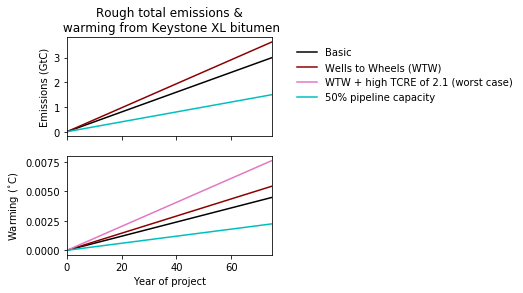

In [131]:
fig, (axt, axb) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(right=0.6)

axt.plot(years, cumulative_emissions, 'k', label='Basic')
axt.plot(years, cumulative_emissions_high, 'darkred', label='Wells to wheels')
axt.plot(years, cumulative_emissions_half_capacity, 'c', label='50% pipeline capacity')
_=axt.set_ylabel('Emissions (GtC)')

axb.plot(years, cumulative_emissions*tcre*1e15, 'k', label='Basic')
axb.plot(years, cumulative_emissions_high*tcre*1e15, 'darkred', label='Wells to Wheels (WTW)')
axb.plot(years, cumulative_emissions_high*2.1/1e18*1e15, 'tab:pink', label='WTW + high TCRE of 2.1 (worst case)')
axb.plot(years, cumulative_emissions_half_capacity*tcre*1e15, 'c', label='50% pipeline capacity')
_=axb.set_ylabel('Warming ($^{\circ}$C)')

axb.legend(frameon=False, loc=(1.1,1.5))
axb.set_xlim([0,75])
axb.set_xlabel('Year of project')
_=axt.set_title('Rough total emissions &\n warming from Keystone XL bitumen')

## Globally-energy equivalent emissions/warming scenarios

As above, but using the mulitplier to scale to meeting global energy demand.

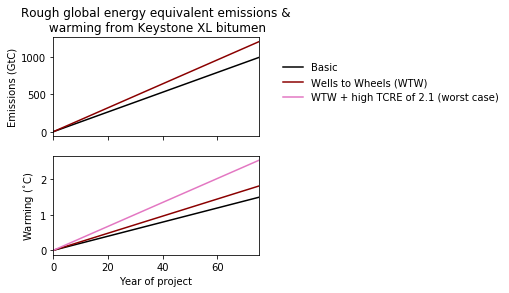

In [142]:
fig, (axt, axb) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(right=0.6)

axt.plot(years, cumulative_emissions*multiplier, 'k', label='Basic')
axt.plot(years, cumulative_emissions_high*multiplier, 'darkred', label='Wells to wheels')
_=axt.set_ylabel('Emissions (GtC)')

axb.plot(years, cumulative_emissions*multiplier*tcre*1e15, 'k', label='Basic')
axb.plot(years, cumulative_emissions_high*multiplier*tcre*1e15, 'darkred', label='Wells to Wheels (WTW)')
axb.plot(years, cumulative_emissions_high*multiplier*2.1/1e18*1e15, 'tab:pink', label='WTW + high TCRE of 2.1 (worst case)')
_=axb.set_ylabel('Warming ($^{\circ}$C)')

axb.legend(frameon=False, loc=(1.1,1.5))
axb.set_xlim([0,75])
axb.set_xlabel('Year of project')
_=axt.set_title('Rough global energy equivalent emissions &\n warming from Keystone XL bitumen')

As above, but accounting for increasing global energy demand at 1.5%/yr

In [141]:
multiplier2 = years*0.015*multiplier + multiplier

fig, (axt, axb) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(right=0.6)

axt.plot(years, cumulative_emissions*multiplier2, 'k', label='Basic')
axt.plot(years, cumulative_emissions_high*multiplier2, 'darkred', label='Wells to wheels')
_=axt.set_ylabel('Emissions (GtC)')

axb.plot(years, cumulative_emissions*multiplier2*tcre*1e15, 'k', label='Basic')
axb.plot(years, cumulative_emissions_high*multiplier2*tcre*1e15, 'darkred', label='Wells to Wheels (WTW)')
axb.plot(years, cumulative_emissions_high*multiplier2*2.1/1e18*1e15, 'tab:pink', label='WTW + high TCRE of 2.1 (worst case)')
_=axb.set_ylabel('Warming ($^{\circ}$C)')

axb.legend(frameon=False, loc=(1.1,1.5))
axb.set_xlim([0,75])
axb.set_xlabel('Year of project')
_=axt.set_title('Rough global energy equivalent emissions &\n warming from Keystone XL bitumen')